In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from nxviz import MatrixPlot, CircosPlot, ArcPlot
import networkx_parallel as nxp
%matplotlib inline

G = nx.read_gpickle("github_users.p")

### Betweenness Centrality (Parallel Processing)

In [6]:
bt = nxp.betweenness_centrality_parallel(G)

In [10]:
import pickle

with open("betweenness_centrality.pickle","wb") as betweenness:
    pickle.dump(bt, betweenness)

with open('betweenness_centrality.pickle', 'rb') as handle:
    bt_centrality = pickle.load(handle)

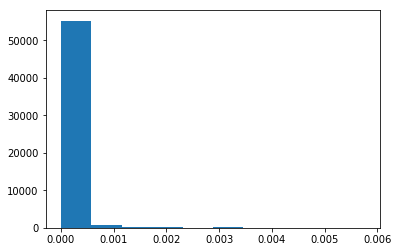

In [4]:
# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.degree_centrality(G).values()))
plt.show()

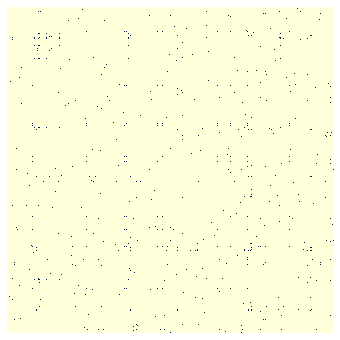

In [6]:
# Import necessary modules
from nxviz import MatrixPlot
import matplotlib.pyplot as plt

# Calculate the largest connected component subgraph: largest_ccs
largest_ccs = sorted(nx.connected_component_subgraphs(G), key=lambda x: len(x))[-1]

# Create the customized MatrixPlot object: h
h = MatrixPlot(graph=largest_ccs) # , node_grouping='grouping' 

# Draw the MatrixPlot to the screen
h.draw()
plt.show()

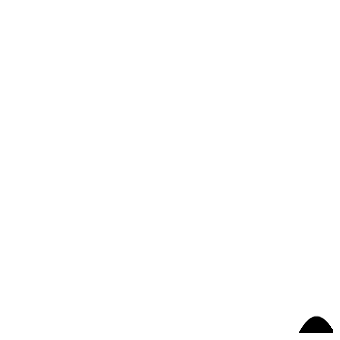

In [7]:
# Iterate over all the nodes in G, including the metadata
for n, d in G.nodes(data=True):
    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G, n)
    
# Create the ArcPlot object: a
a = ArcPlot(G, node_order='degree')
# Draw the ArcPlot to the screen
a.draw()
plt.show()